행렬을 이용한 SVD 기초

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# 1. Set Matrix
test=np.array([[1,2,3,4,5,6],
               [4,5,6,7,8,9],
               [7,8,9,10,11,12],
               [10,11,12,13,14,15],
               [13,14,15,16,17,18]]) # <mxn> 
print(test)
m=test.shape[0]
n=test.shape[1]
print('(m:{}, n:{})'.format(m,n))

[[ 1  2  3  4  5  6]
 [ 4  5  6  7  8  9]
 [ 7  8  9 10 11 12]
 [10 11 12 13 14 15]
 [13 14 15 16 17 18]]
(m:5, n:6)


U: (5, 5)
S: (5, 6)
V: (6, 6)


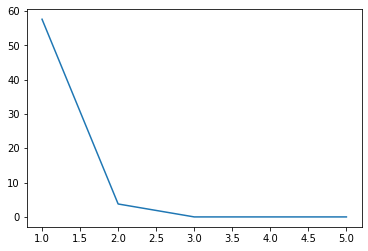

In [46]:
# 2. SVD 
U,Sigma,VT = np.linalg.svd(test)

# set S, V
S=np.eye(N=m, M=n,k=0)
np.fill_diagonal (S,Sigma)
V=VT.T

# check
print('U:',U.shape) # left singular vectors (u1 | u2 | u3 | ....) <mxm> 
print('S:',S.shape) # singular values (diagonal -> σ1, σ2, σ3, ...) <mxn> 
print('V:',V.shape) # right singular vectors (v1 | v2 | v3 | ....) <nxn> 
plt.plot([i for i in range(1,min(m,n)+1)],Sigma)

위 그래프를 보면 2개의 특이값을 이용해서 데이터를 충분히 표현할 수 있음을 짐작 가능함

FULL SVD와 Truncated SVD

![Image of Yaktocat](https://velog.velcdn.com/images/amin/post/649fdfc1-5048-453f-8da8-b5c9169113a3/image.png)

특이값 전체를 이용해서 재구축

In [15]:
# 3-1. Reconstruction (Full SVD)
Y = np.dot(U,S)
R = np.dot(Y,V.T)
print(R)

[[ 1.  2.  3.  4.  5.  6.]
 [ 4.  5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11. 12.]
 [10. 11. 12. 13. 14. 15.]
 [13. 14. 15. 16. 17. 18.]]


특이값 2개를 이용해서 재구축

In [45]:
# 3-2. Reconstruction (Truncated SVD)
t=2
Y = np.dot(U[:,:t],S[:t,:t])
R = np.dot(Y,V.T[:t,:])

# check
print('U[:,:t]:',U[:,:t].shape) # <mxt> 
print('S[:t,:t]:',S[:t,:t].shape) # <txt> 
print('V.T[:t,:]:',V.T[:t,:].shape) # <txn> 
print('\n',R)

U[:,:t]: (5, 2)
S[:t,:t]: (2, 2)
V.T[:t,:]: (2, 6)

 [[ 1.  2.  3.  4.  5.  6.]
 [ 4.  5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11. 12.]
 [10. 11. 12. 13. 14. 15.]
 [13. 14. 15. 16. 17. 18.]]


--> 특이값을 2개 이용하면 원본과 차이가 없음

특이값 1개를 이용해서 재구축

In [48]:
# 3-2. Reconstruction (Truncated SVD)
t=1
Y = np.dot(U[:,:t],S[:t,:t])
R = np.dot(Y,V.T[:t,:])

# check
print('U[:,:t]:',U[:,:t].shape) # <mxt> 
print('S[:t,:t]:',S[:t,:t].shape) # <txt> 
print('V.T[:t,:]:',V.T[:t,:].shape) # <txn> 
print('\n',R)

U[:,:t]: (5, 1)
S[:t,:t]: (1, 1)
V.T[:t,:]: (1, 6)

 [[ 2.8642519   3.18808603  3.51192015  3.83575427  4.1595884   4.48342252]
 [ 5.15132777  5.73374013  6.31615249  6.89856485  7.48097722  8.06338958]
 [ 7.43840363  8.27939423  9.12038483  9.96137543 10.80236603 11.64335663]
 [ 9.7254795  10.82504834 11.92461717 13.02418601 14.12375485 15.22332369]
 [12.01255536 13.37070244 14.72884951 16.08699659 17.44514367 18.80329074]]


--> 특이값을 1개만 이용하면 원본과 비슷하긴 하나 차이가 발생함